# Part 1

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('graded_1.csv')
df.head()

,obs
0,4
1,3
2,3
3,8
4,7


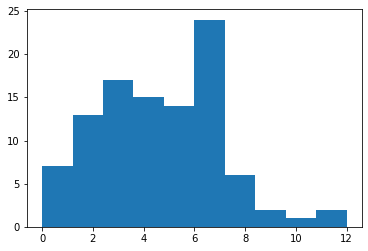

In [100]:
plt.hist(df['obs'])
plt.show()

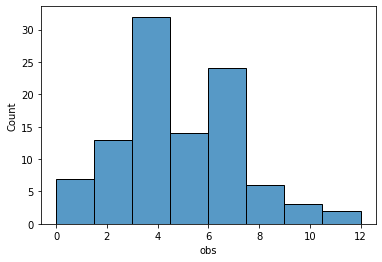

In [75]:
sns.histplot(df['obs'])
plt.show()

In [76]:
df.describe()

,obs
count,101.000000
mean,4.663366
std,2.396987
min,0.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,12.000000


In [77]:
stats_labels = ['Mean Observed', 'Variance Observed', 'Skew Observed', 'Kurt Observed']
stats_values = [round(df['obs'].mean(), 2), round(df['obs'].var(), 2), round(df['obs'].skew(),2), round(df['obs'].kurt(),2)]
print(set(zip(stats_labels, stats_values)))

{('Variance Observed', 5.75), ('Skew Observed', 0.5), ('Mean Observed', 4.66), ('Kurt Observed', -0.01)}


In [78]:
import statsmodels.api as sm
import scipy.stats as stats

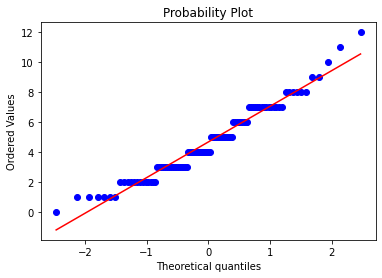

In [79]:
import matplotlib.pyplot as pltp
stats.probplot(df['obs'], plot=plt)
plt.show()

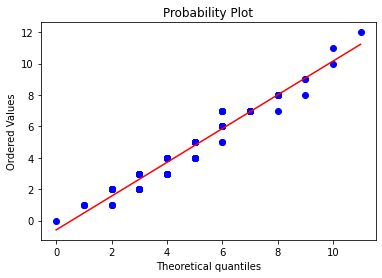

In [80]:
stats.probplot(df['obs'], dist='poisson', sparams=(4.90,), plot=plt)
plt.show()


#### Hypothesis Testing

In [81]:
grouped_df = pd.DataFrame()

In [82]:
grouped_df['freq'] = df.groupby('obs')['obs'].count()
grouped_df.head()

,freq
obs,
0,1
1,6
2,13
3,17
4,15


In [83]:
grouped_df['obs_prob'] = grouped_df['freq'] / len(df) 
grouped_df.head()

,freq,obs_prob
obs,,
0,1,0.009901
1,6,0.059406
2,13,0.128713
3,17,0.168317
4,15,0.148515


In [84]:
from scipy import stats
from scipy.stats import poisson
from scipy.stats import chisquare

In [85]:
grouped_df.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='obs')

In [86]:
grouped_df['Poisson_pmf'] = poisson.pmf(k=grouped_df.index, mu=df['obs'].mean())

grouped_df.head()

,freq,obs_prob,Poisson_pmf
obs,,,
0,1,0.009901,0.009435
1,6,0.059406,0.043997
2,13,0.128713,0.102588
3,17,0.168317,0.159468
4,15,0.148515,0.185914


In [87]:
#grouped_df['Poisson_pmf'] = round(grouped_df['Poisson_pmf'],2)

In [88]:
grouped_df['Poisson_freq'] = grouped_df['Poisson_pmf']*len(df)

grouped_df.head()

,freq,obs_prob,Poisson_pmf,Poisson_freq
obs,,,,
0,1,0.009901,0.009435,0.952900
1,6,0.059406,0.043997,4.443720
2,13,0.128713,0.102588,10.361346
3,17,0.168317,0.159468,16.106251
4,15,0.148515,0.185914,18.777337


In [89]:
obs_freq_sum = grouped_df['freq'].sum()
exp_freq_sum = grouped_df['Poisson_freq'].sum()
print(obs_freq_sum,"   ", exp_freq_sum)

101     100.88843724141073


In [90]:
diff = obs_freq_sum - exp_freq_sum
diff

0.11156275858927245

In [91]:
len(grouped_df)

13

In [92]:
diff/len(grouped_df)

0.008581750660713264

In [93]:
grouped_df['Poisson_freq'] = grouped_df['Poisson_freq'] +  (diff/len(grouped_df))

In [94]:
grouped_df['Poisson_freq'].sum()

100.99999999999999

In [95]:
obs_freq = list(grouped_df['freq'])
expec_freq = list(grouped_df['Poisson_freq'])

#### Null Hypothesis : Data follows Poisson Distribution
#### Alternate Hypo. : Data does not follow Poisson dist.

In [96]:
stats.chisquare(obs_freq, expec_freq)

Power_divergenceResult(statistic=11.67284799759617, pvalue=0.47229832947129)

#### Since pvalue > 0.05 ( significance level) ; Accept Null

In [97]:
import scipy.stats
scipy.stats.chi2.ppf(1-0.05, df= 10)

18.307038053275146

#### Since tabulated value > calculated value ; Accept the Null

In [98]:
len(grouped_df)

13

In [99]:
grouped_df

,freq,obs_prob,Poisson_pmf,Poisson_freq
obs,,,,
0,1,0.009901,0.009435,0.961481
1,6,0.059406,0.043997,4.452301
2,13,0.128713,0.102588,10.369928
3,17,0.168317,0.159468,16.114833
4,15,0.148515,0.185914,18.785919
5,14,0.138614,0.173397,17.521702
6,9,0.089109,0.134769,13.620264
7,15,0.148515,0.089783,9.076619
8,6,0.059406,0.052336,5.294529


# Part-2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('graded1.csv')
df.head()

,Age Group,Brand Preference
0,40 - 50,B
1,20 - 30,C
2,40 - 50,C
3,20 - 30,B
4,40 - 50,B


In [3]:
ct = pd.crosstab(df['Age Group '], df['Brand Preference'], margins = True )  # contingency table
ct

Brand Preference,A,B,C,D,All
Age Group,,,,,
20 - 30,70,126,98,83,377
40 - 50,157,160,283,98,698
All,227,286,381,181,1075


#### Expected frequency

In [4]:
ct1 = ct.transpose()

In [5]:
ct1

Age Group,20 - 30,40 - 50,All
Brand Preference,,,
A,70,157,227
B,126,160,286
C,98,283,381
D,83,98,181
All,377,698,1075


In [6]:
ct["A"]["All"]

227

In [7]:
age = list(df['Age Group '].unique())
brand = list(df['Brand Preference'].unique())

In [8]:
exp1 = {}

for a in age:
    exp2 = {}
    
    for b in brand:
        exp2[b] = ( ct1[a]["All"] * ct[b]["All"] ) / ct1["All"]["All"]
        
    exp1[a] = exp2

In [9]:
exp1

{'40 - 50': {'B': 185.70046511627908,
  'C': 247.38418604651162,
  'A': 147.39162790697674,
  'D': 117.52372093023256},
 '20 - 30': {'B': 100.29953488372092,
  'C': 133.61581395348838,
  'A': 79.60837209302325,
  'D': 63.47627906976744}}

In [10]:
exp1['40 - 50']['B']

185.70046511627908

#### Calculated Chi-square value

In [11]:
chi_sq_cal = 0

for a in age:
    for b in brand:
        
        obs, exp = ct1[a][b], exp1[a][b]
        
        val = ((obs - exp) ** 2 ) / exp
        
        chi_sq_cal = chi_sq_cal + val

In [12]:
chi_sq_cal

35.79787580812233

#### Shortcut to calculate contingency table

In [13]:
contab = np.array([ct['A'][0:2].values,
                   ct['B'][0:2].values,
                   ct['C'][0:2].values,
                   ct['D'][0:2].values
                  ])

In [14]:
from scipy import stats
stats.chi2_contingency(contab)

(35.79787580812233,
 8.262639420013194e-08,
 3,
 array([[ 79.60837209, 147.39162791],
        [100.29953488, 185.70046512],
        [133.61581395, 247.38418605],
        [ 63.47627907, 117.52372093]]))

#### Degree of Freedom

In [15]:
dof =  (len(age)-1) * (len(brand)-1)
dof

3

#### Tabulated Value

In [25]:
stats.chi2.ppf(1-0.01, df=dof)  # significance level = 0.01

11.344866730144373

#### P-value

In [23]:
1 - stats.chi2.cdf(chi_sq_cal, dof)

8.262639417111473e-08

#### Since Tabulated Value < Calculated Value ; We reject the Null

#### Since P-value < 0.01 ( significance level ); We reject the Null

#### Therefore variables are not independent